# Proyecto Final
by Matías Moré

In [103]:
#Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette(["#024059", "#66D9CD", "#D9923B", "#BF726B", "#401F1F"])



## Dataset Fumadores

Este conjunto de datos consiste en datos biologicos de distintos individuos, recolectados con el objetivo de analizar los efectos y las señales del habito tabaquico. A travez de distintas caracteristicas de estudios de laboratorio como el estado sanguineo, urinario, hepatico, higienico y su relacion con el tabaquismo, se buscara encontrar patrones que determinen biologicamente los parametros a tener en cuenta para identificar a individuos fumadores. Teniendo en cuenta estos datos se realizara una comparacion de estas variables a fin de determinar su utilidad y trascendencia para lograr este fin.

Origen del dataset: https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking?resource=download

### Code Acquisition

In [104]:
smoke_data = pd.read_csv("/workspaces/CoderPosta/Data/smoking.csv")
smoke_data

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


# Limpieza de Datos

### Nulos y Duplicados

In [120]:
df = smoke_data.copy()
df["height(M)"] = df["height(cm)"] / 100
df["IMC"] = df["weight(kg)"] / (df["height(M)"] ** 2)
print(df.isna().sum().sort_values())
print('Cant. de Duplicados ' ,df.duplicated().sum())





ID                     0
smoking                0
tartar                 0
dental caries          0
oral                   0
Gtp                    0
ALT                    0
AST                    0
serum creatinine       0
Urine protein          0
hemoglobin             0
LDL                    0
HDL                    0
height(M)              0
triglyceride           0
fasting blood sugar    0
relaxation             0
systolic               0
hearing(right)         0
hearing(left)          0
eyesight(right)        0
eyesight(left)         0
waist(cm)              0
weight(kg)             0
height(cm)             0
age                    0
gender                 0
Cholesterol            0
IMC                    0
dtype: int64
Cant. de Duplicados  0


In [121]:
df.dtypes

ID                       int64
gender                  object
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
oral                    object
dental caries            int64
tartar                  object
smoking                  int64
height(M)              float64
IMC                    float64
dtype: object

In [122]:
categoric_col = []
for col in df.columns:
	if (df[col].nunique()<10) and (df[col].dtype=='object'):
		categoric_col.append(col) 
  
print('Categoric Col {}'.format(categoric_col))

Categoric Col ['gender', 'oral', 'tartar']


In [123]:
Numeric=list(set(df.columns)- set(categoric_col))
Numeric= [x for x in Numeric if x!= "state"]
print('Cont Col {}'.format(Numeric))

Cont Col ['hearing(left)', 'relaxation', 'age', 'waist(cm)', 'fasting blood sugar', 'AST', 'ALT', 'serum creatinine', 'Gtp', 'systolic', 'height(M)', 'HDL', 'IMC', 'LDL', 'weight(kg)', 'triglyceride', 'hearing(right)', 'dental caries', 'eyesight(left)', 'Cholesterol', 'Urine protein', 'eyesight(right)', 'hemoglobin', 'smoking', 'ID', 'height(cm)']


### Analisis univariado

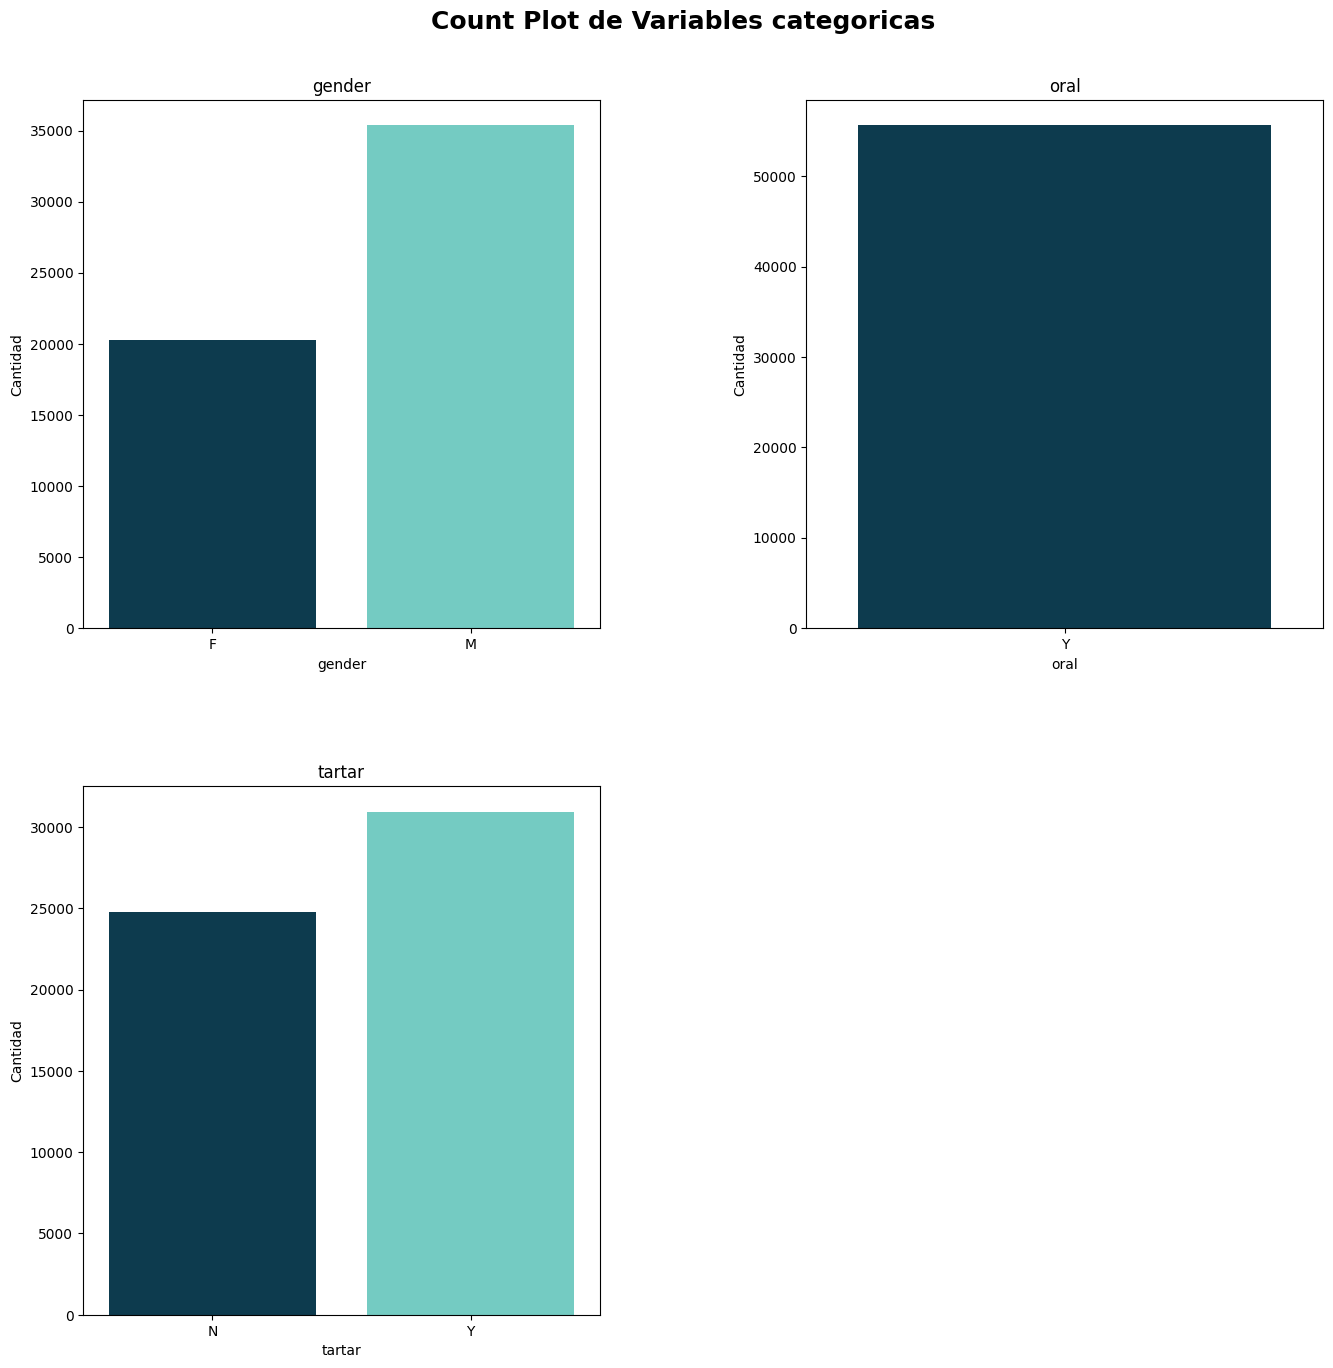

In [124]:
fig = plt.figure(figsize=[16,15])
fig.suptitle('Count Plot de Variables categoricas', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.3, wspace=0.4);
for i , columns in enumerate(categoric_col):
    input = np.unique(df[columns] , return_counts = True)
    col= 'input'
    ax1 = fig.add_subplot(2, 2, i+1);
    ax1 = sns.barplot(x=list(eval(f'{col}[0]')), y=list(eval(f'{col}[1]')))
    plt.xlabel(columns)
    plt.ylabel("Cantidad")
    plt.title(columns)

In [125]:
df.nunique().sort_values()

oral                       1
dental caries              2
tartar                     2
hearing(left)              2
smoking                    2
hearing(right)             2
gender                     2
Urine protein              6
height(cm)                13
height(M)                 13
age                       14
eyesight(right)           17
eyesight(left)            19
weight(kg)                22
serum creatinine          38
relaxation                95
HDL                      126
systolic                 130
hemoglobin               145
IMC                      148
AST                      219
ALT                      245
fasting blood sugar      276
Cholesterol              286
LDL                      289
triglyceride             390
Gtp                      488
waist(cm)                566
ID                     55692
dtype: int64

In [126]:
df.drop(labels="oral", axis=1, inplace=True)
df.head(5)

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking,height(M),IMC
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,1.0,0.7,18.0,19.0,27.0,0,Y,0,1.55,24.973985
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,1.0,0.6,22.0,19.0,18.0,0,Y,0,1.60,23.437500
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,1.0,1.0,21.0,16.0,22.0,0,N,1,1.70,20.761246
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,1.0,1.0,19.0,26.0,18.0,0,Y,0,1.65,25.711662
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,1.0,0.6,16.0,14.0,22.0,0,N,0,1.55,24.973985


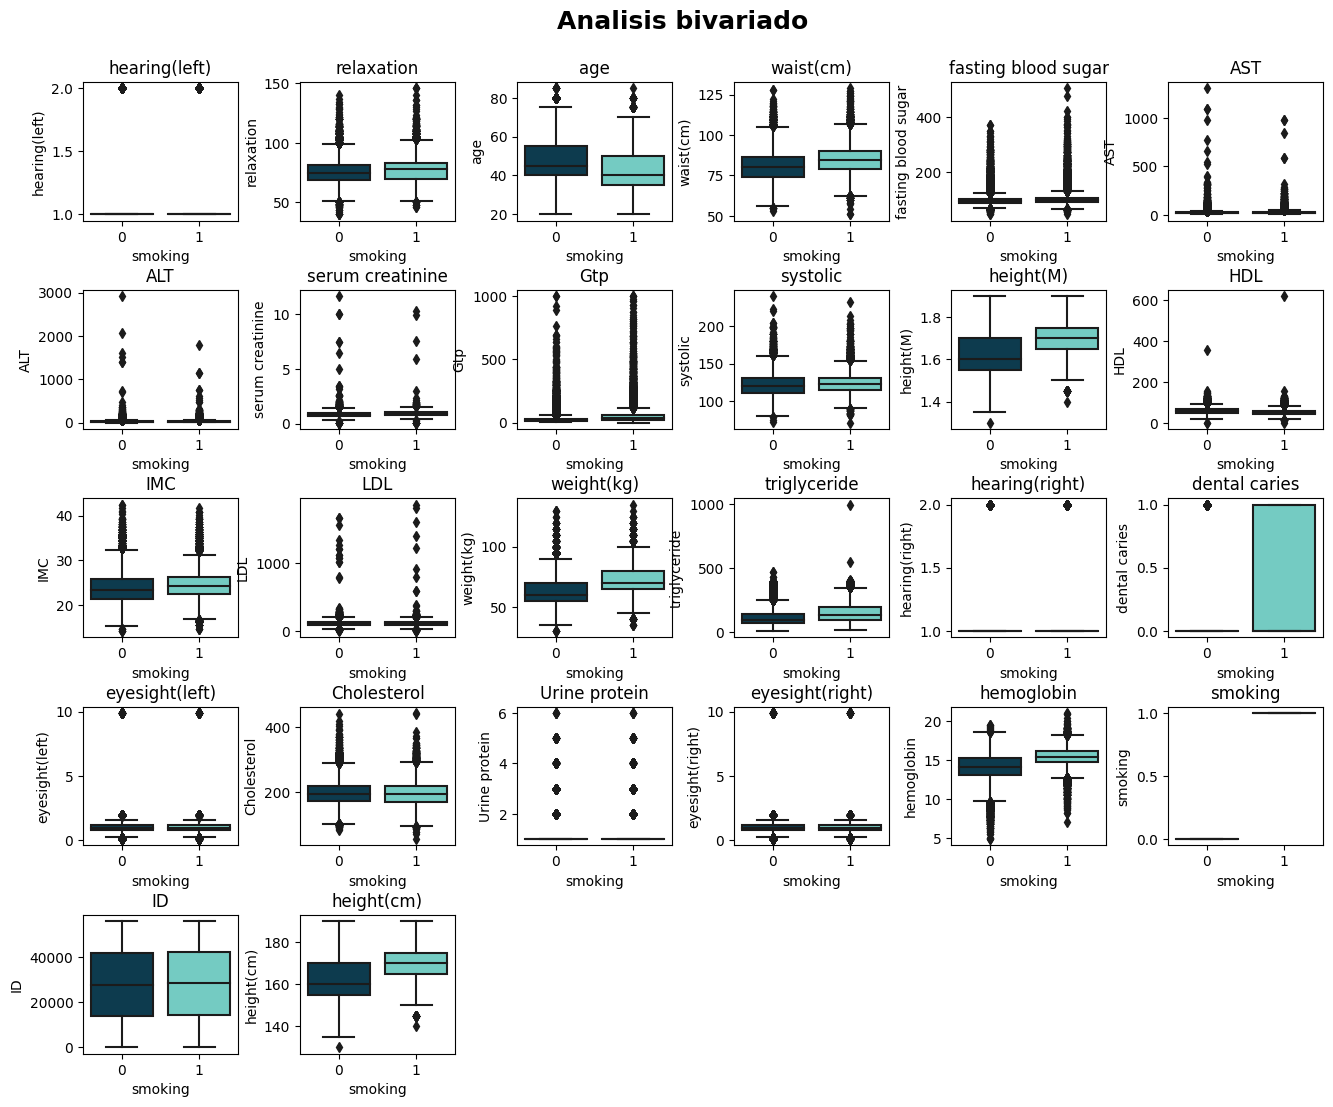

In [127]:
fig = plt.figure(figsize=[16,12])
fig.suptitle('Analisis bivariado', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Numeric):
    a = fig.add_subplot(5, 6, i+1)
    a=sns.boxplot(x = 'smoking' , y =col , ax=a  , data = df )
    a.set_title(col)

In [128]:
dict = {}
for col in Numeric:
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    IQR  = percentile75 - percentile25 
    upper_limit = percentile75 + 1.5 * IQR 
    lower_limit = percentile25 - 1.5 * IQR
    dict['upper_limit'+ '_' + col] = upper_limit
    dict['lower_limit'+ '_' + col] = lower_limit 

In [129]:
dict

{'upper_limit_hearing(left)': 1.0,
 'lower_limit_hearing(left)': 1.0,
 'upper_limit_relaxation': 100.0,
 'lower_limit_relaxation': 52.0,
 'upper_limit_age': 77.5,
 'lower_limit_age': 17.5,
 'upper_limit_waist(cm)': 106.0,
 'lower_limit_waist(cm)': 58.0,
 'upper_limit_fasting blood sugar': 126.5,
 'lower_limit_fasting blood sugar': 66.5,
 'upper_limit_AST': 41.5,
 'lower_limit_AST': 5.5,
 'upper_limit_ALT': 55.0,
 'lower_limit_ALT': -9.0,
 'upper_limit_serum creatinine': 1.2999999999999998,
 'lower_limit_serum creatinine': 0.5000000000000001,
 'upper_limit_Gtp': 82.0,
 'lower_limit_Gtp': -22.0,
 'upper_limit_systolic': 157.0,
 'lower_limit_systolic': 85.0,
 'upper_limit_height(M)': 1.8499999999999996,
 'lower_limit_height(M)': 1.4500000000000002,
 'upper_limit_HDL': 94.5,
 'lower_limit_HDL': 18.5,
 'upper_limit_IMC': 32.89871504157219,
 'lower_limit_IMC': 14.828672209624585,
 'upper_limit_LDL': 202.0,
 'lower_limit_LDL': 26.0,
 'upper_limit_weight(kg)': 105.0,
 'lower_limit_weight(kg)':

In [130]:
for col in Numeric:
    print('Total {} de pacientes con {} menor al limite inferior.'.format(len(df[df[col] < dict_david['lower_limit_' + col]] ) , col))
    print('Total {} de pacientes con {} mayor al limite superior.'.format(len(df[df[col] > dict_david['upper_limit_' + col]] ) , col))

Total 0 de pacientes con hearing(left) menor al limite inferior.
Total 1425 de pacientes con hearing(left) mayor al limite superior.
Total 128 de pacientes con relaxation menor al limite inferior.
Total 578 de pacientes con relaxation mayor al limite superior.
Total 0 de pacientes con age menor al limite inferior.
Total 295 de pacientes con age mayor al limite superior.
Total 34 de pacientes con waist(cm) menor al limite inferior.
Total 462 de pacientes con waist(cm) mayor al limite superior.
Total 116 de pacientes con fasting blood sugar menor al limite inferior.
Total 3182 de pacientes con fasting blood sugar mayor al limite superior.
Total 0 de pacientes con AST menor al limite inferior.
Total 3699 de pacientes con AST mayor al limite superior.
Total 0 de pacientes con ALT menor al limite inferior.
Total 3710 de pacientes con ALT mayor al limite superior.
Total 1739 de pacientes con serum creatinine menor al limite inferior.
Total 1408 de pacientes con serum creatinine mayor al limi

In [131]:
for col in Numeric:
    df[col] = np.where(
        df[col] > dict['upper_limit_' + col], # si se comple
        dict['upper_limit_' + col], # poner limite superior (Q3+1.5IQR)
        np.where( # en caso contrario
            df[col] < dict['lower_limit_' + col], # si es menor al limite inferior
            dict['lower_limit_' + col], # poner el Q1-1.5IQR
            df[col]  # si no se cumple nada dejar quieto
        )
    )

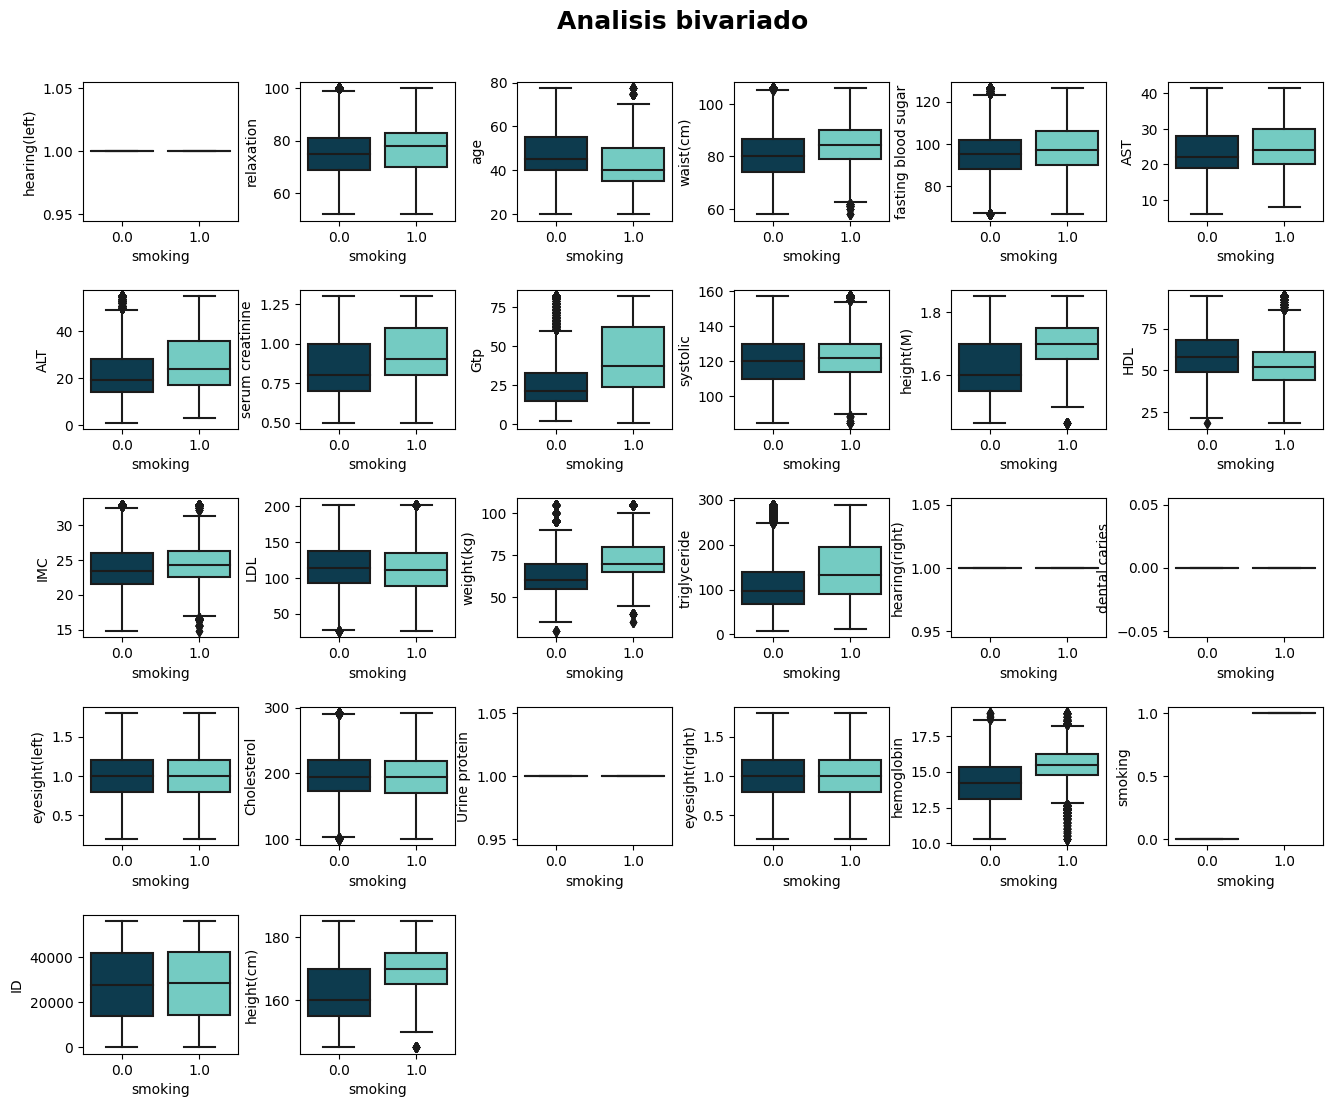

In [132]:
fig = plt.figure(figsize=[16,12])
fig.suptitle('Analisis bivariado', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Numeric):
    a = fig.add_subplot(5, 6, i+1)
    a=sns.boxplot(x = 'smoking' , y =col , ax=a  , data = df )

